In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,\
classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [2]:
import tensorflow as tf

: 

: 

In [2]:
employee_df = pd.read_csv('/home/ronald/Downloads/business/Bases de dados/Human_Resources.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
employee_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## Data Exploration

In [4]:
employee_df.shape

(1470, 35)

In [5]:
employee_df.iloc[:,:15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   DailyRate                1470 non-null   int64 
 4   Department               1470 non-null   object
 5   DistanceFromHome         1470 non-null   int64 
 6   Education                1470 non-null   int64 
 7   EducationField           1470 non-null   object
 8   EmployeeCount            1470 non-null   int64 
 9   EmployeeNumber           1470 non-null   int64 
 10  EnvironmentSatisfaction  1470 non-null   int64 
 11  Gender                   1470 non-null   object
 12  HourlyRate               1470 non-null   int64 
 13  JobInvolvement           1470 non-null   int64 
 14  JobLevel                 1470 non-null  

In [6]:
employee_df.iloc[:,14:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   JobLevel                  1470 non-null   int64 
 1   JobRole                   1470 non-null   object
 2   JobSatisfaction           1470 non-null   int64 
 3   MaritalStatus             1470 non-null   object
 4   MonthlyIncome             1470 non-null   int64 
 5   MonthlyRate               1470 non-null   int64 
 6   NumCompaniesWorked        1470 non-null   int64 
 7   Over18                    1470 non-null   object
 8   OverTime                  1470 non-null   object
 9   PercentSalaryHike         1470 non-null   int64 
 10  PerformanceRating         1470 non-null   int64 
 11  RelationshipSatisfaction  1470 non-null   int64 
 12  StandardHours             1470 non-null   int64 
 13  StockOptionLevel          1470 non-null   int64 
 14  TotalWorkingYears       

In [7]:
employee_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
employee_df.Attrition = employee_df.Attrition.apply(lambda x: 1 if x == 'Yes' else 0)
employee_df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [9]:
employee_df.Over18 = employee_df.Over18.apply(lambda x: 1 if x == 'Y' else 0)
employee_df.OverTime = employee_df.OverTime.apply(lambda x: 1 if x == 'Yes' else 0)

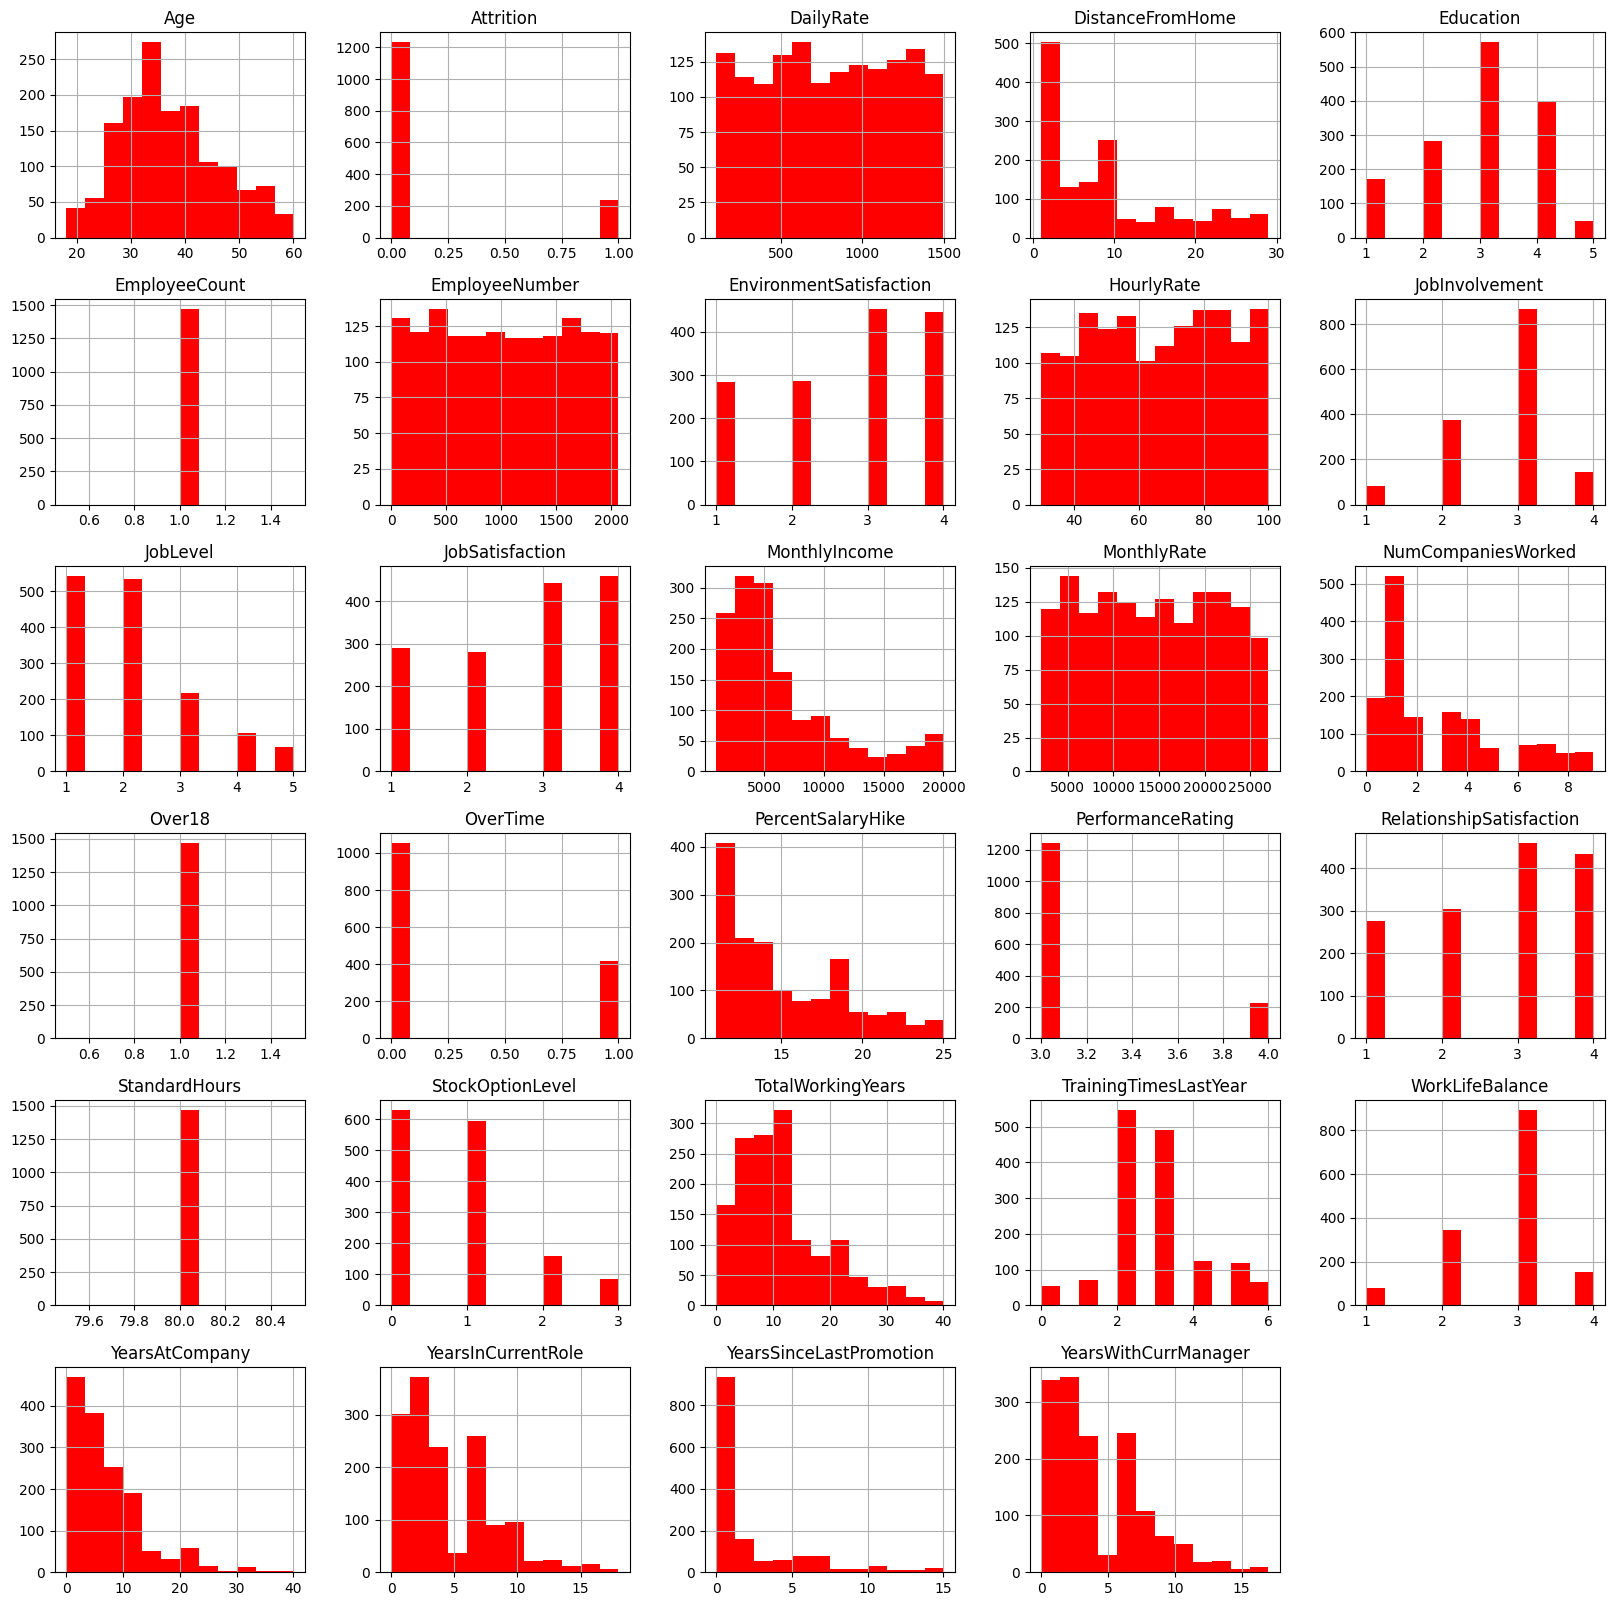

In [10]:
employee_df.hist(bins=12, figsize=(20,20), color='r');

In [11]:
dataset = employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)

In [12]:
left_df = dataset[dataset.Attrition == 1]
stayed_df = dataset[dataset.Attrition == 0]
left_df.shape, stayed_df.shape

((237, 31), (1233, 31))

/tmp/ipykernel_9477/1737673078.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = dataset.corr()


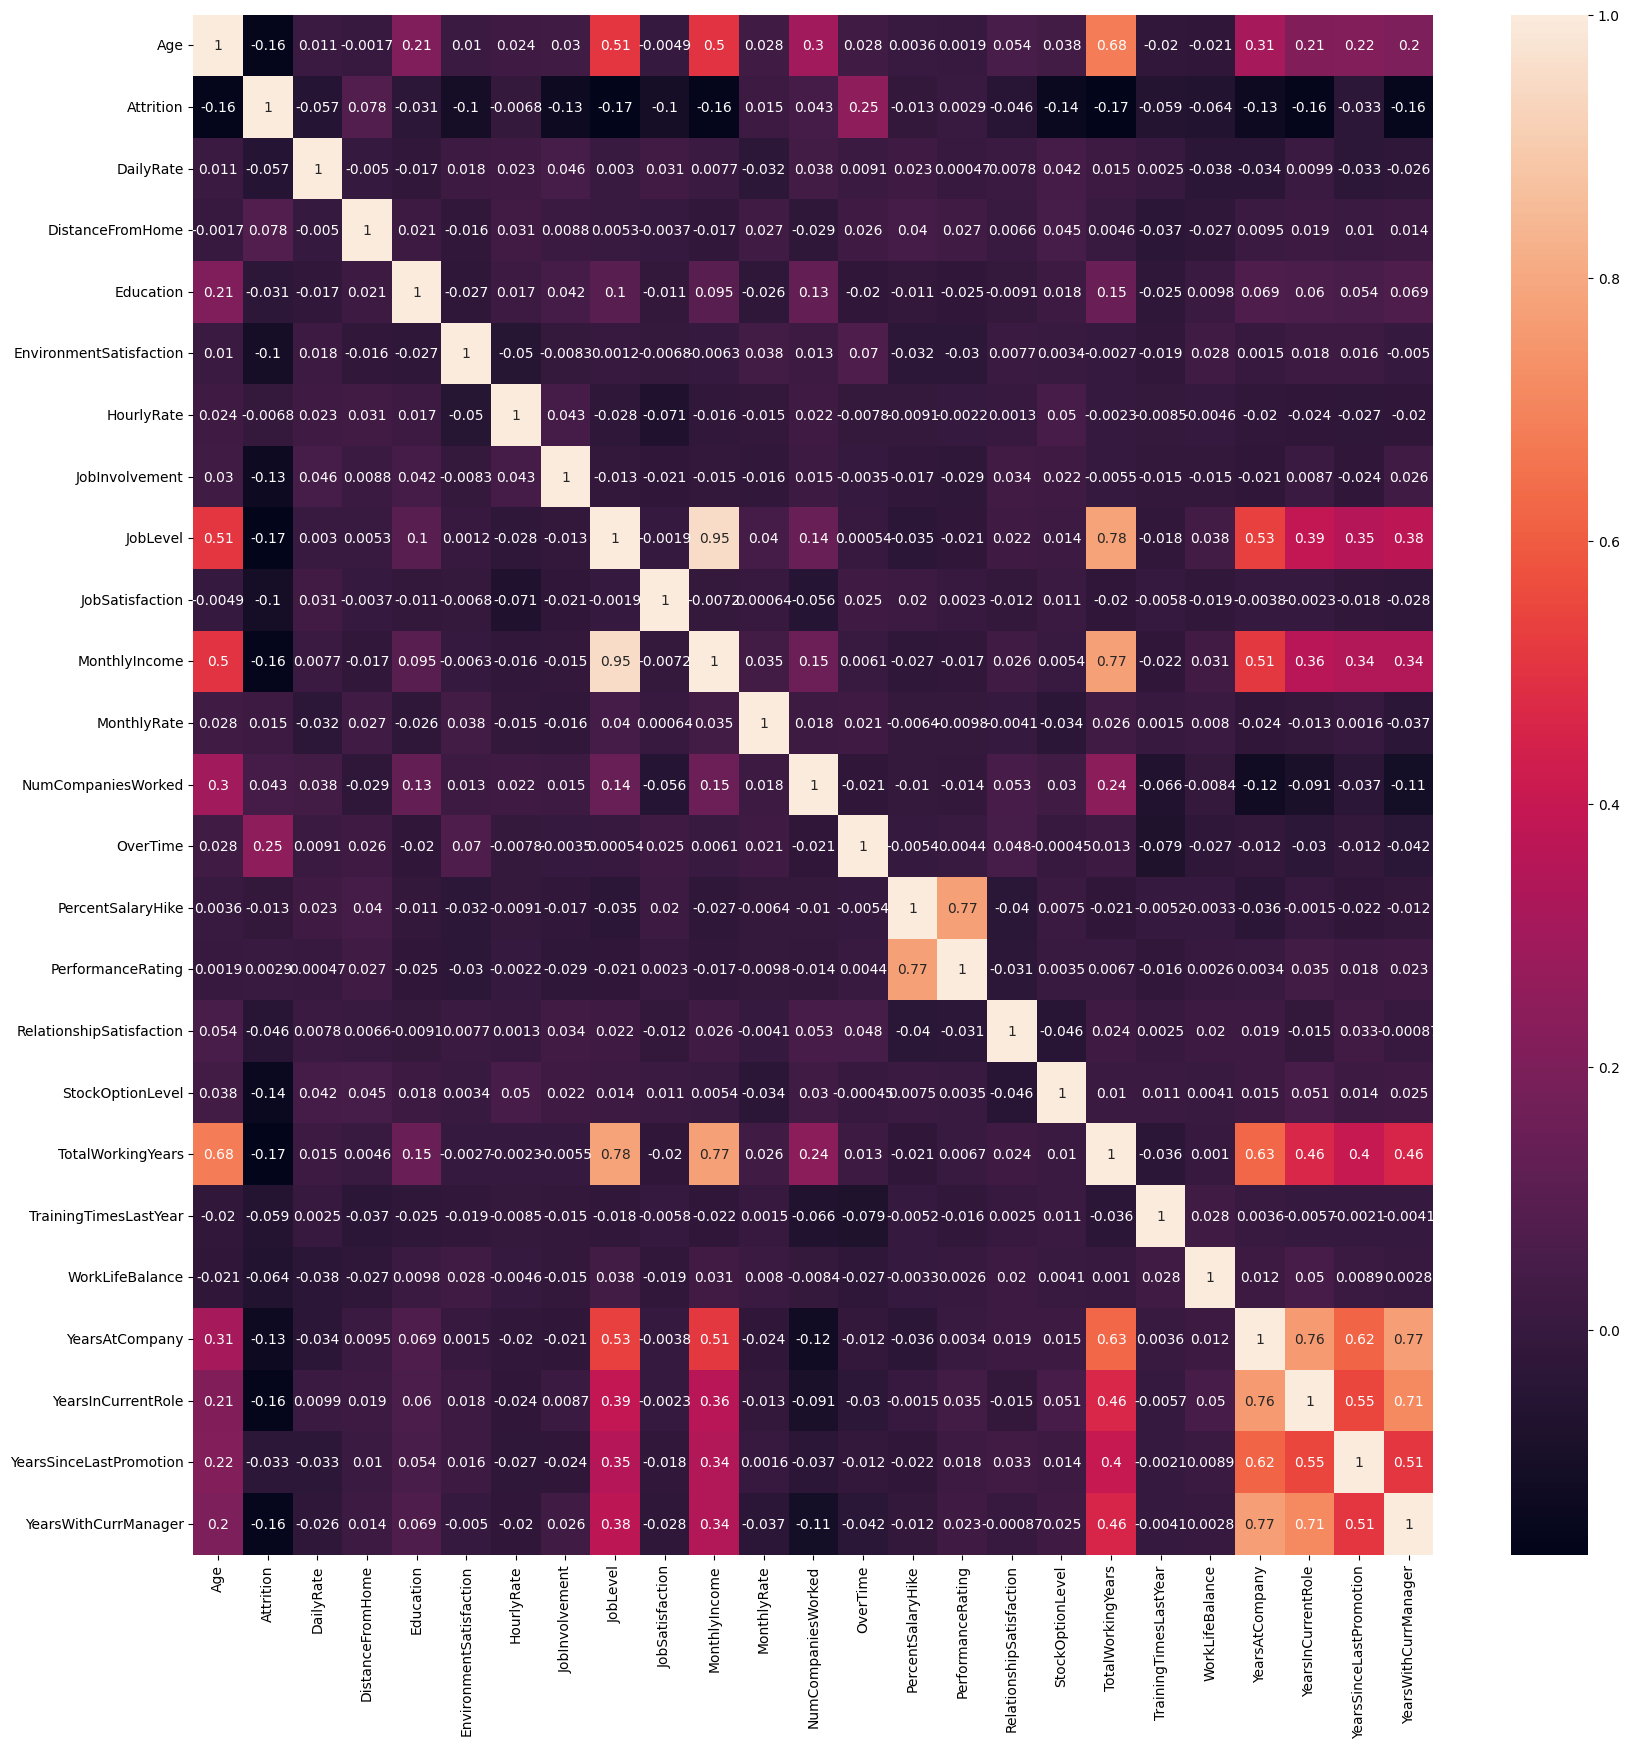

In [13]:
correlations = dataset.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

/tmp/ipykernel_9477/2342306415.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = left_df.corr()


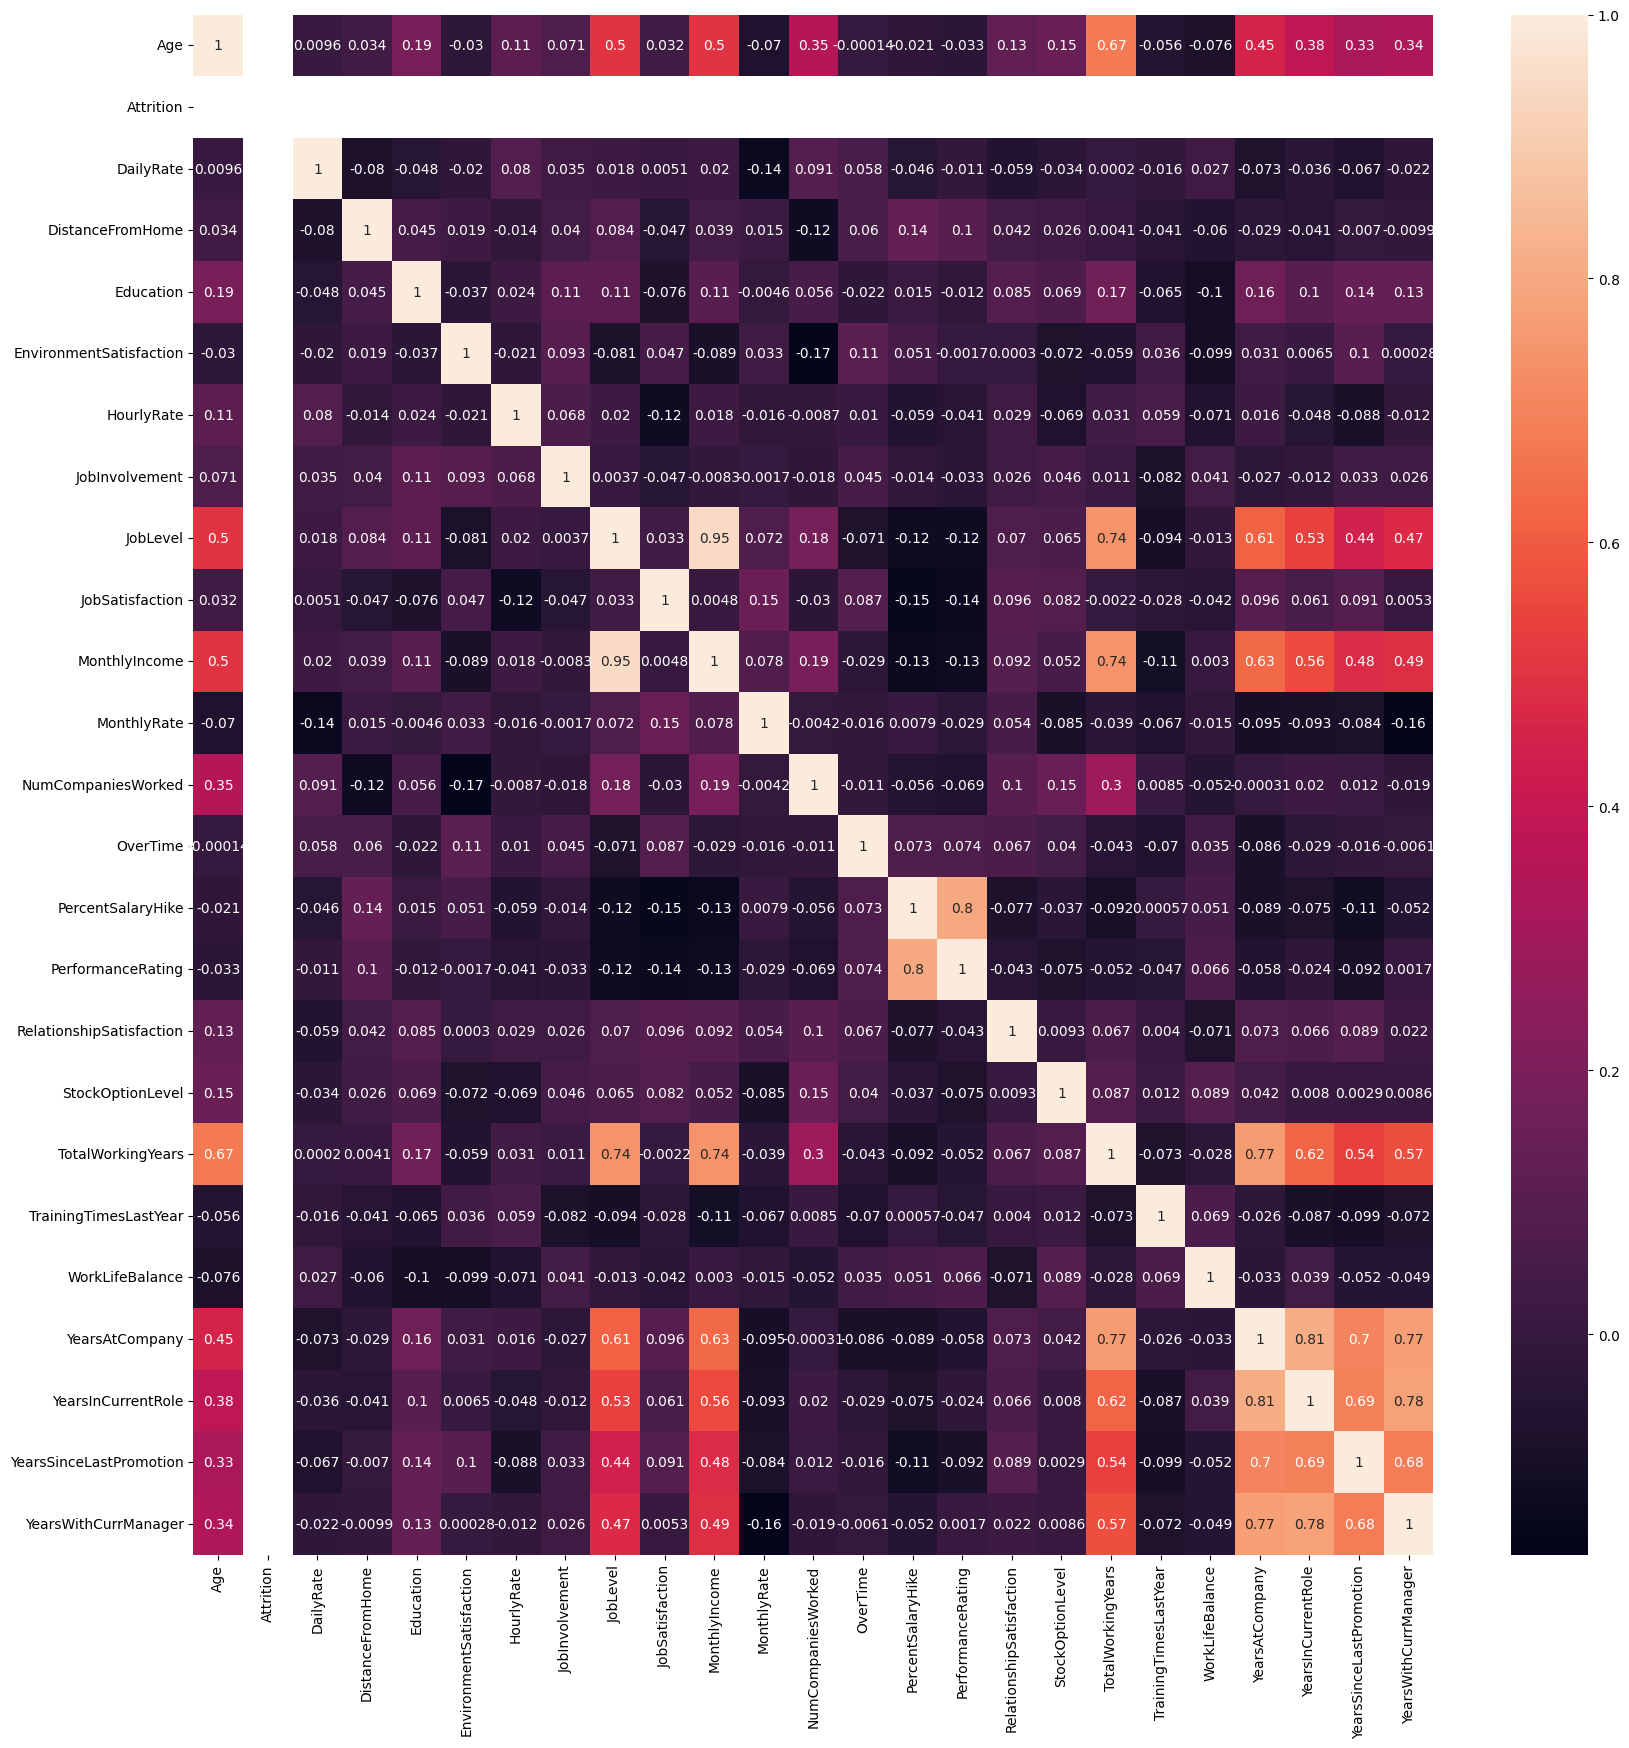

In [14]:
correlations = left_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

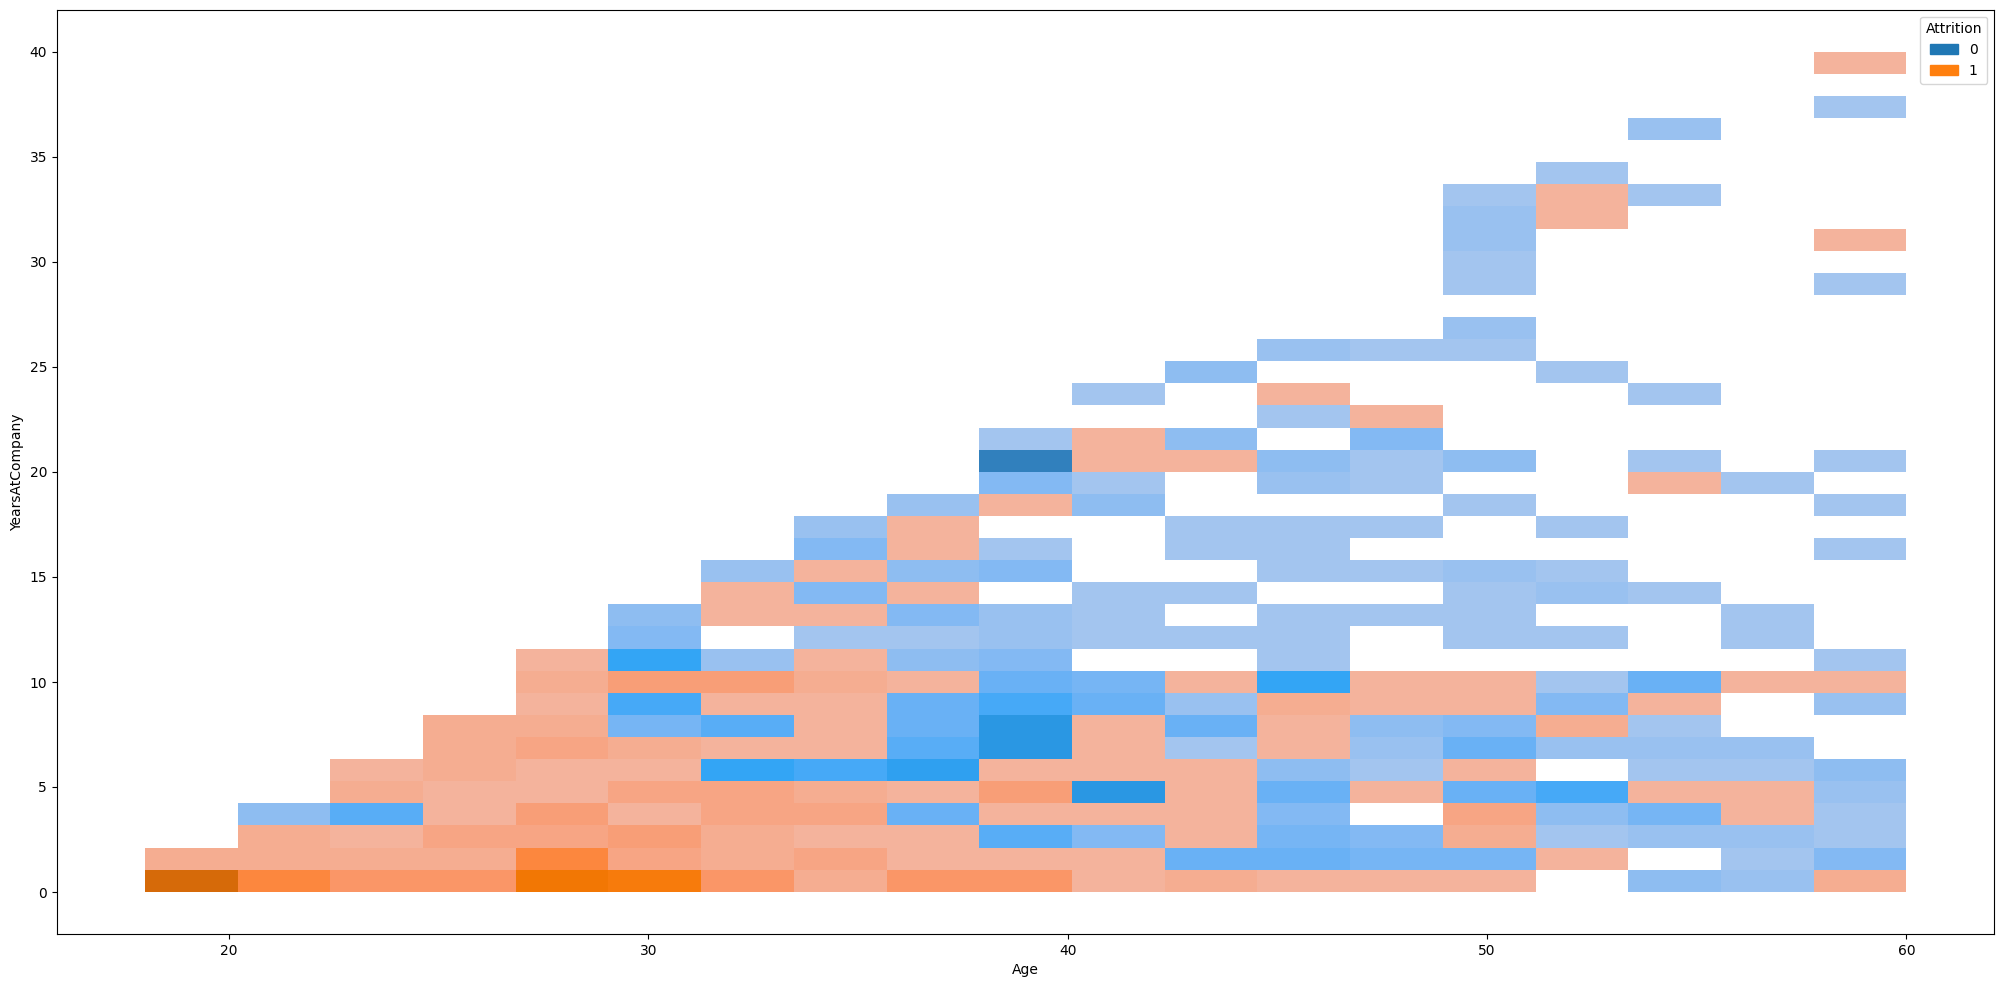

In [15]:
plt.figure(figsize=(25,12))
sns.histplot(x='Age', y='YearsAtCompany', hue='Attrition',data=dataset);

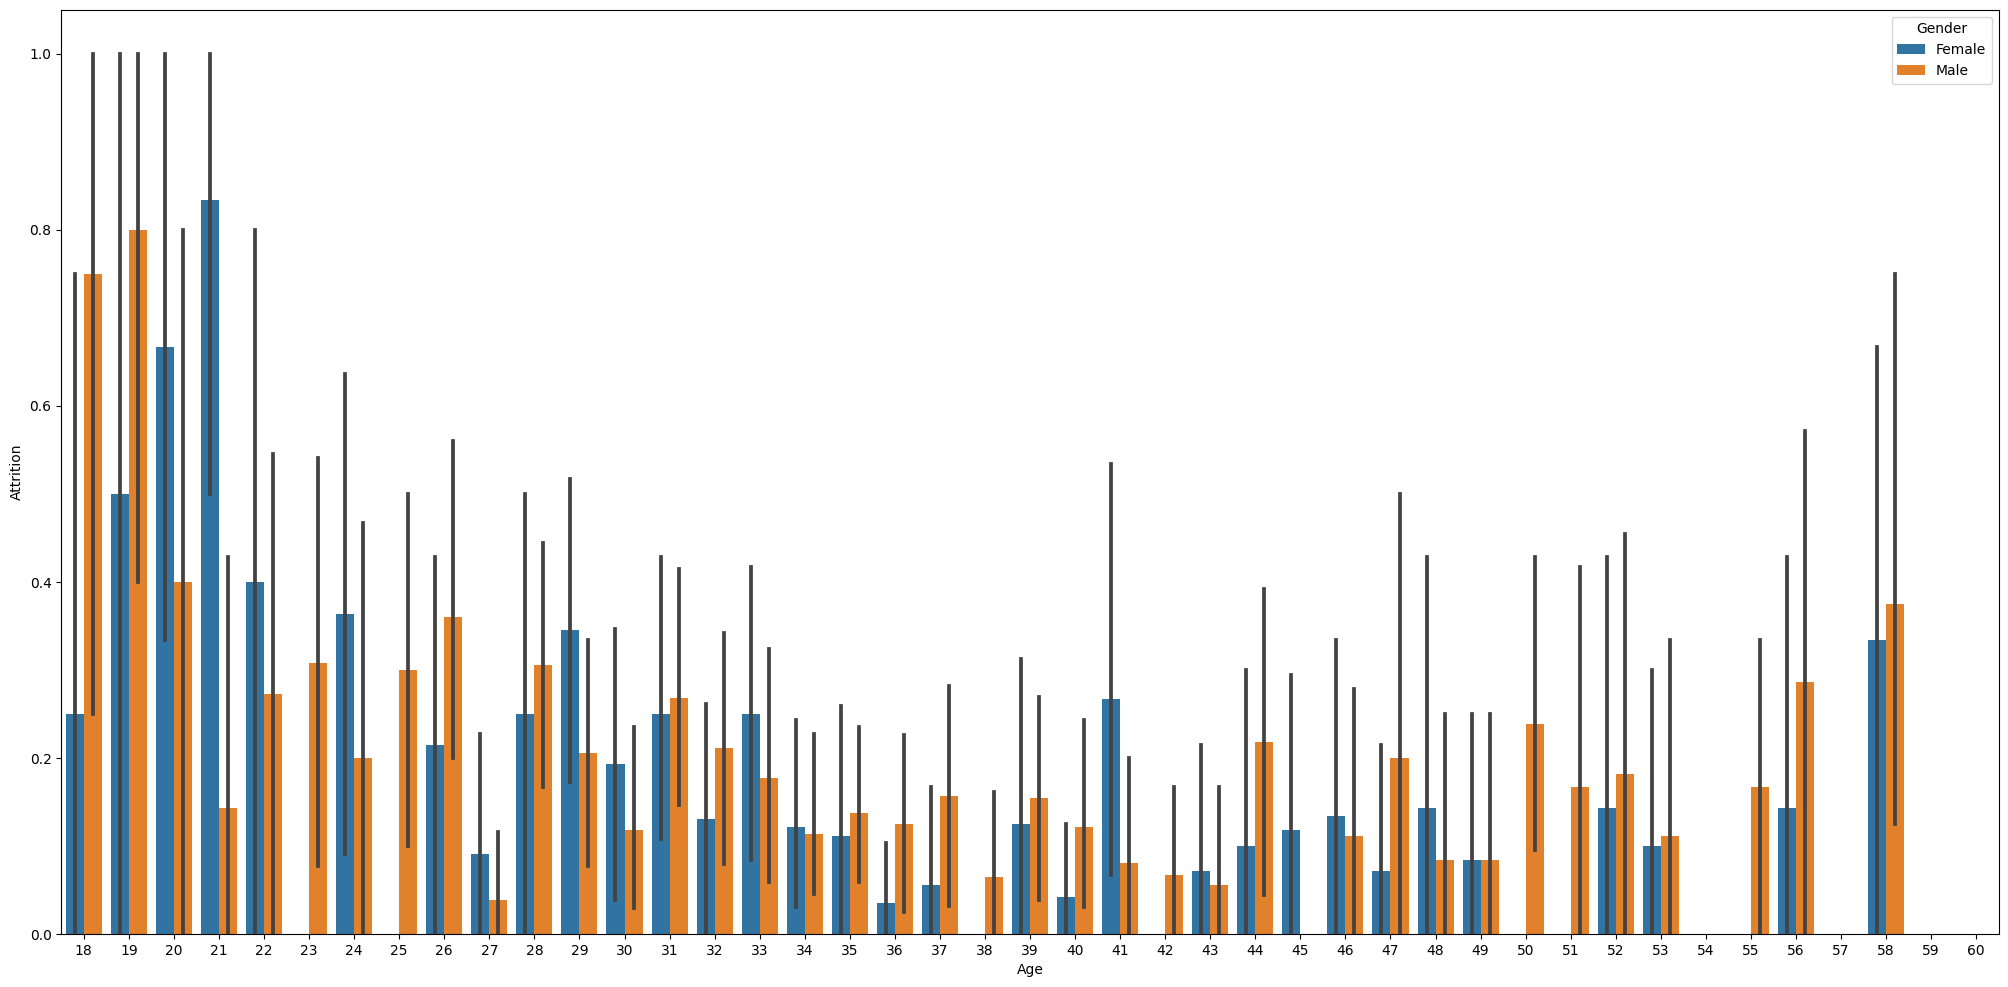

In [16]:
plt.figure(figsize=(25,12))
sns.barplot(x='Age', y='Attrition', hue='Gender',data=dataset);

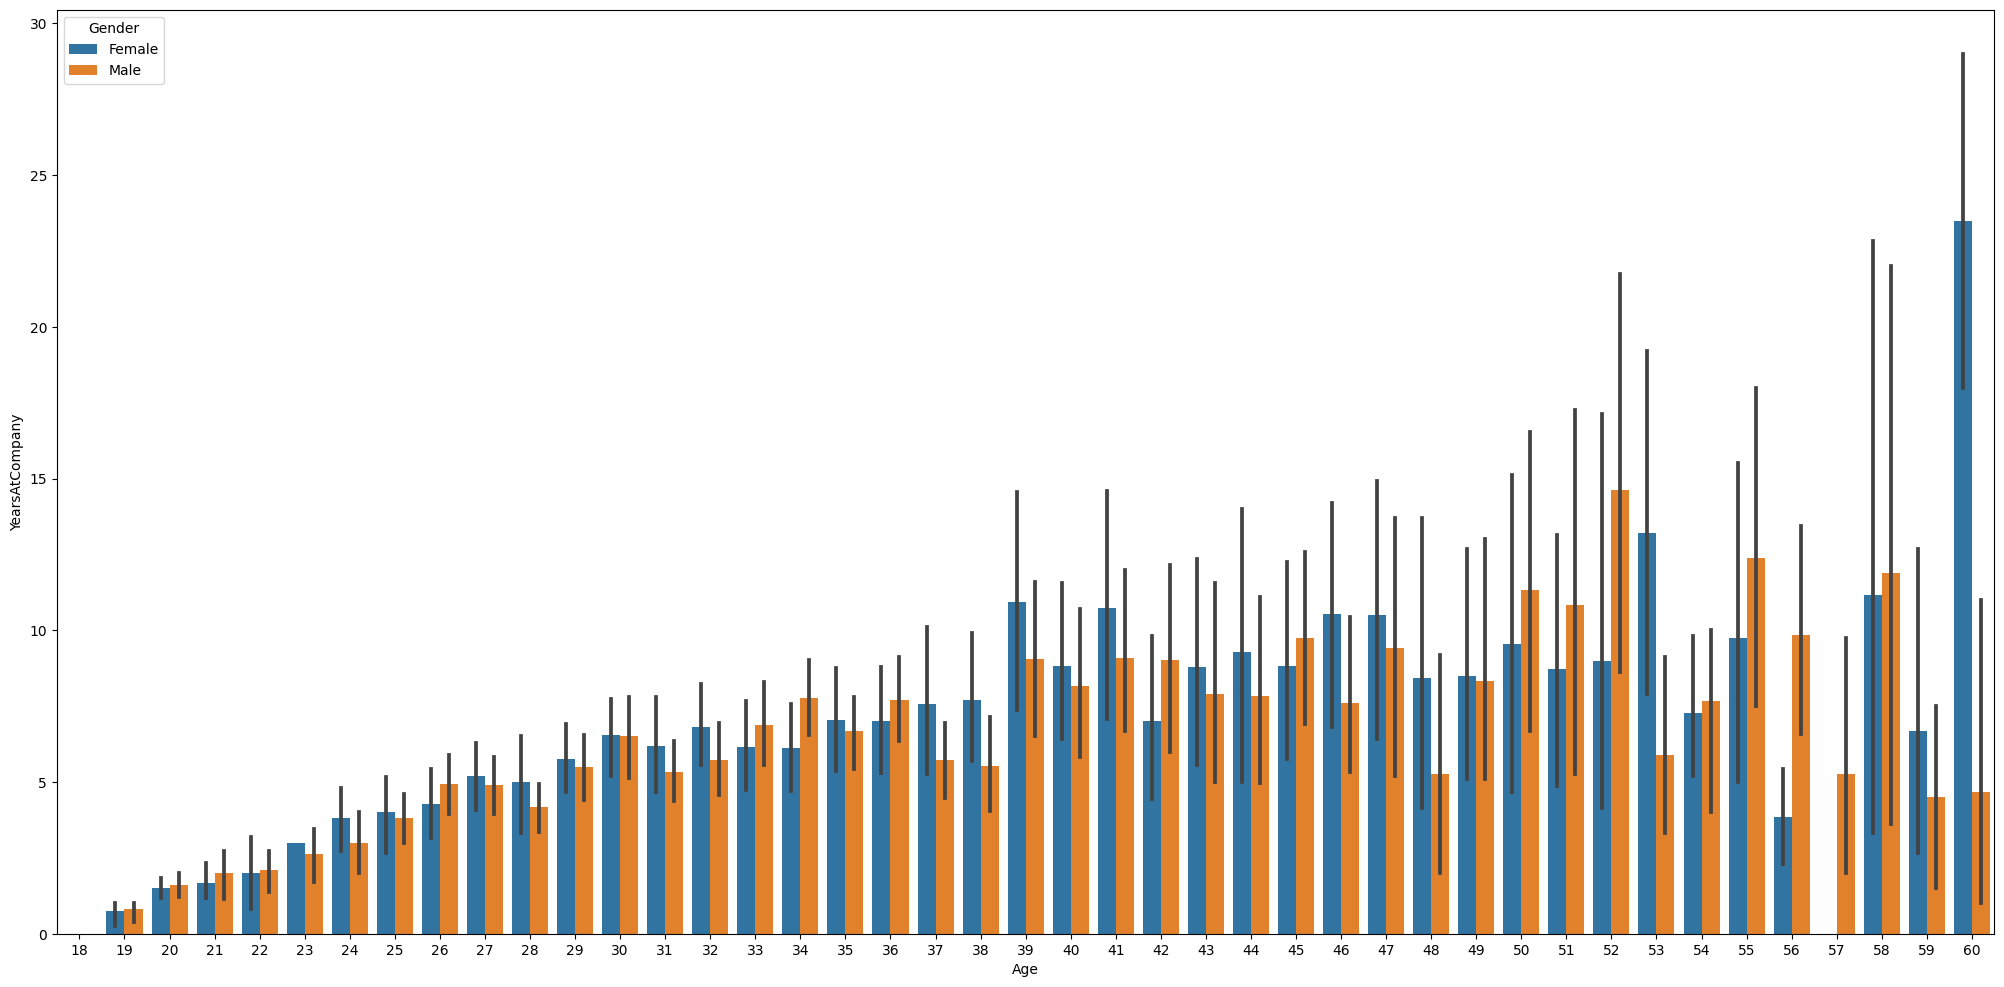

In [17]:
plt.figure(figsize=(25,12))
sns.barplot(x='Age', y='YearsAtCompany', hue='Gender', data=dataset);

In [18]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


<AxesSubplot: xlabel='Gender', ylabel='JobLevel'>

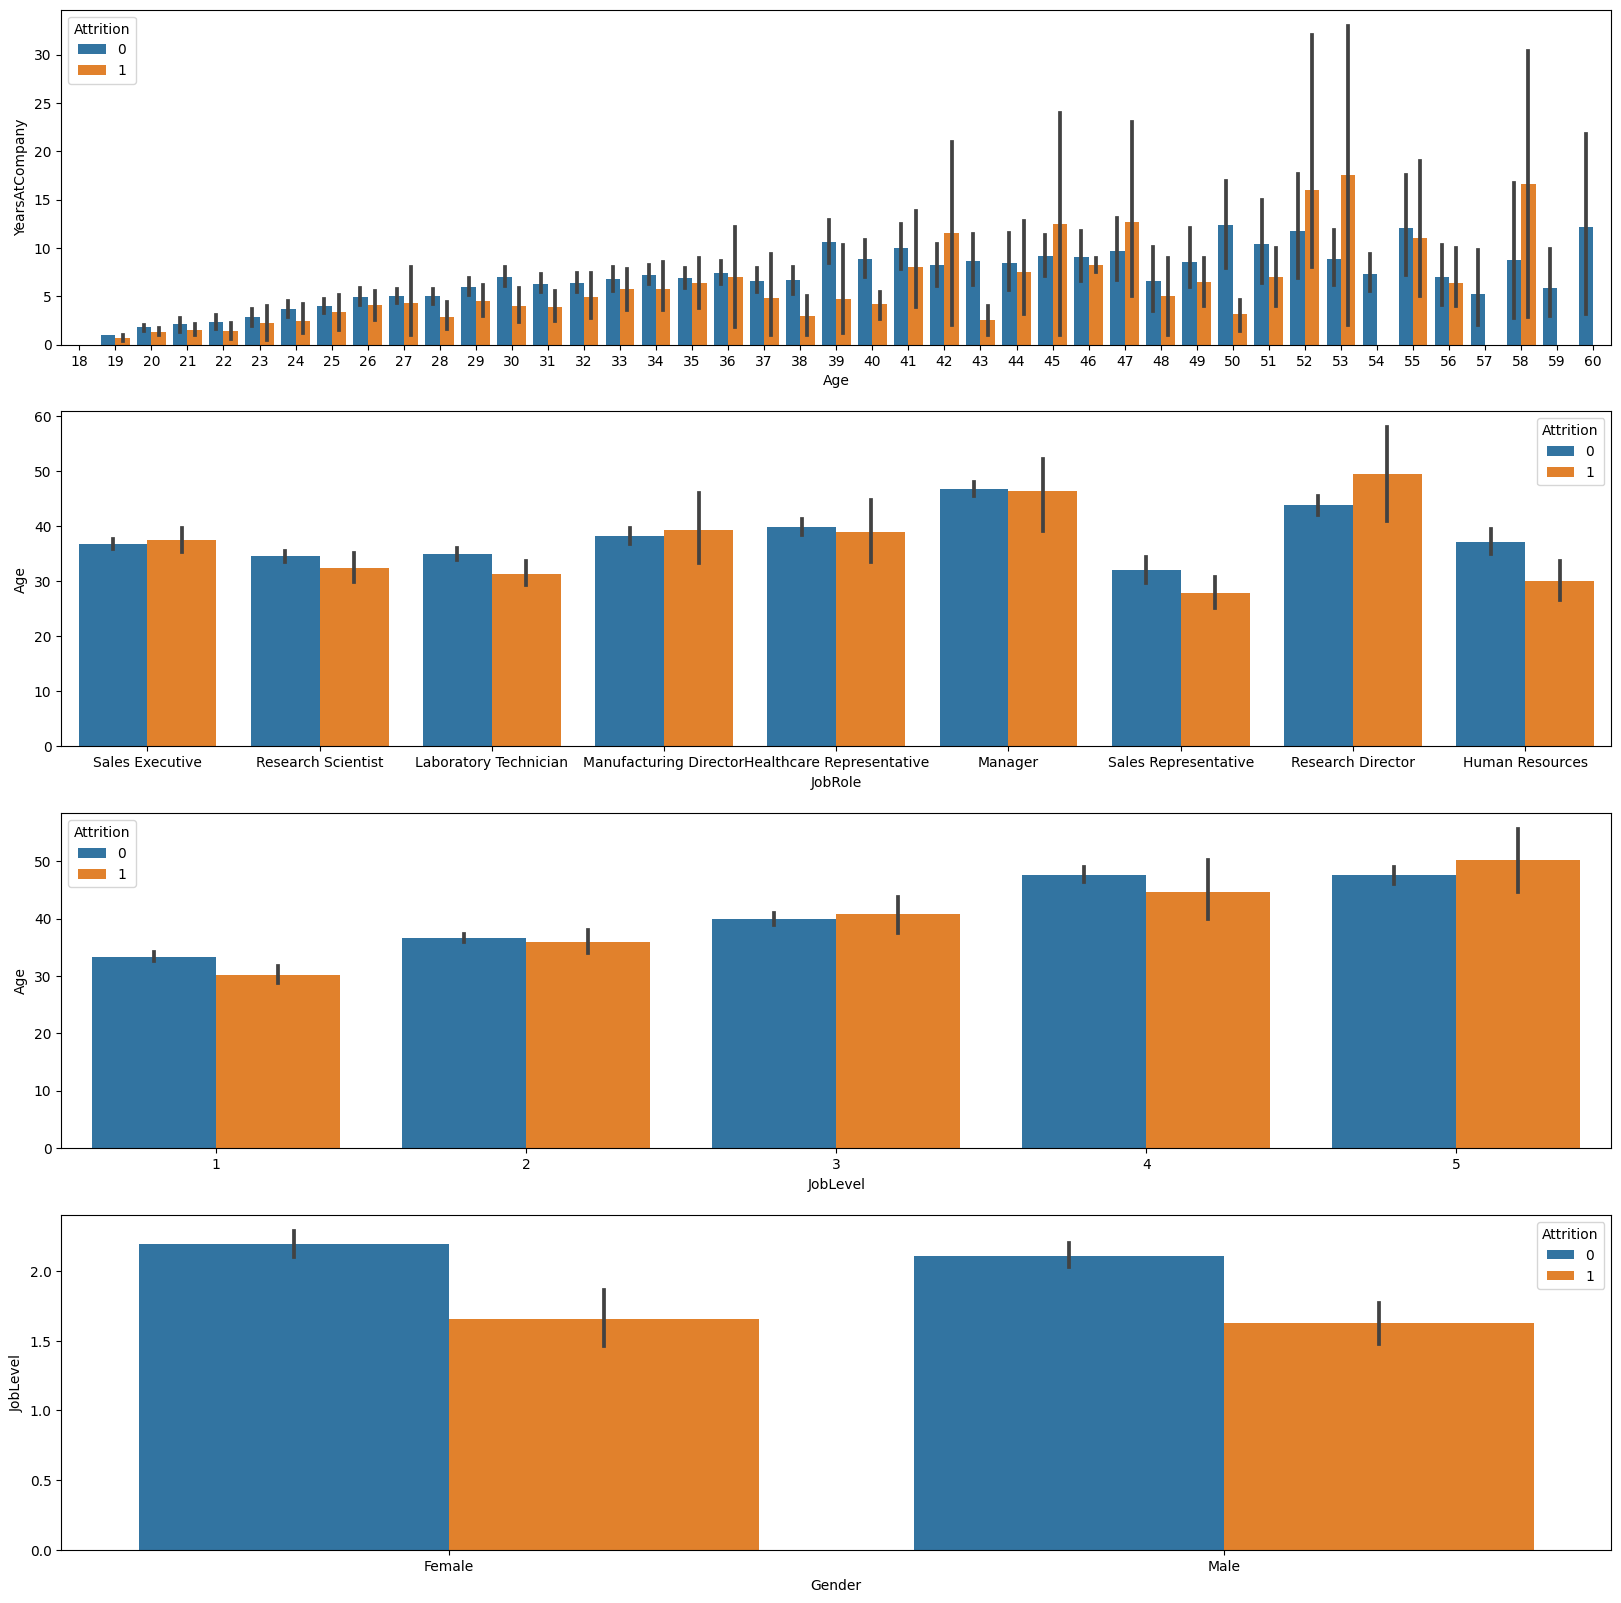

In [19]:
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.barplot(x='Age', y='YearsAtCompany', hue='Attrition', data=dataset)
plt.subplot(412)
sns.barplot(x='JobRole', y='Age', hue='Attrition', data=dataset)
plt.subplot(413)
sns.barplot(x='JobLevel', y='Age', hue='Attrition', data=dataset)
plt.subplot(414)
sns.barplot(x='Gender', y='JobLevel', hue='Attrition', data=dataset)

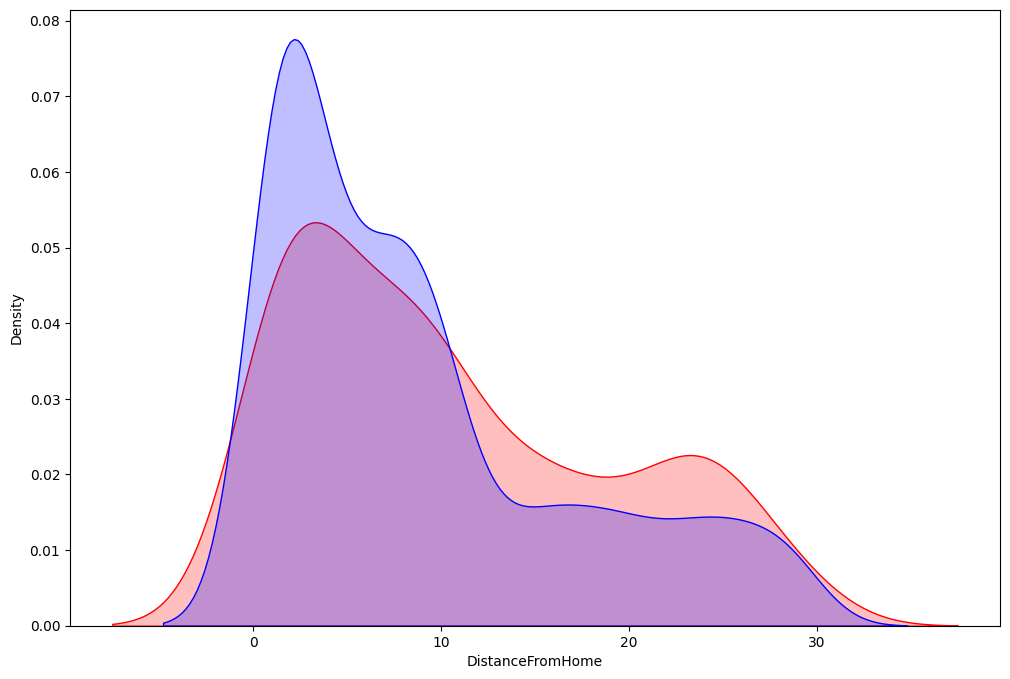

In [20]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df.DistanceFromHome, label='Employess Left', fill='True', color='r')
sns.kdeplot(stayed_df.DistanceFromHome, label='Employess Left', fill='True', color='b');

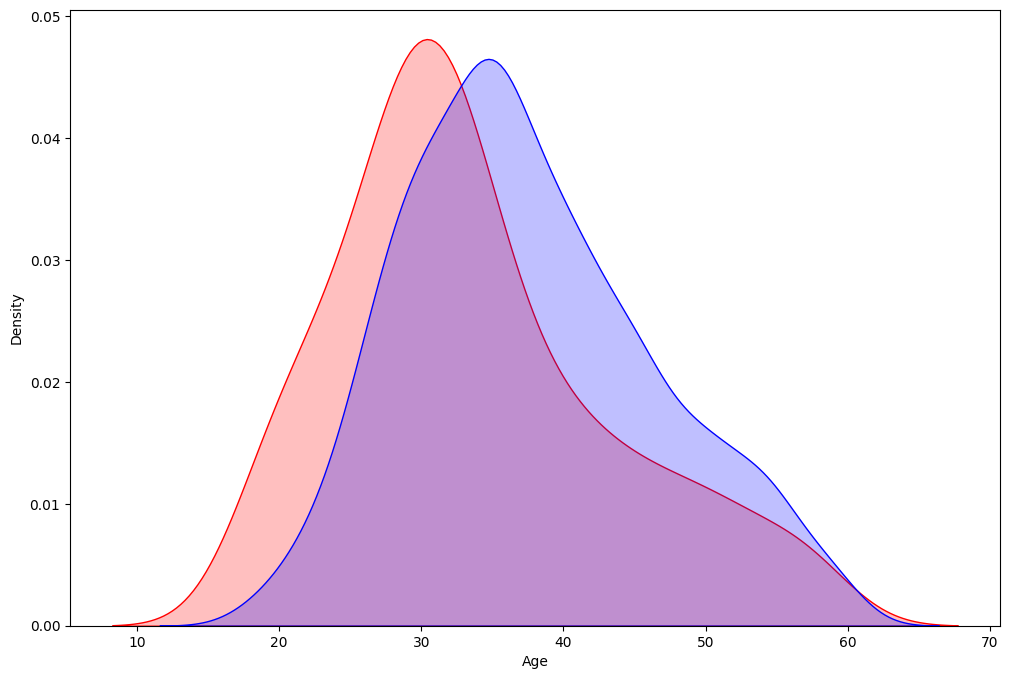

In [21]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df.Age, label='Employess Left', fill='True', color='r')
sns.kdeplot(stayed_df.Age, label='Employess Stayed', fill='True', color='b');

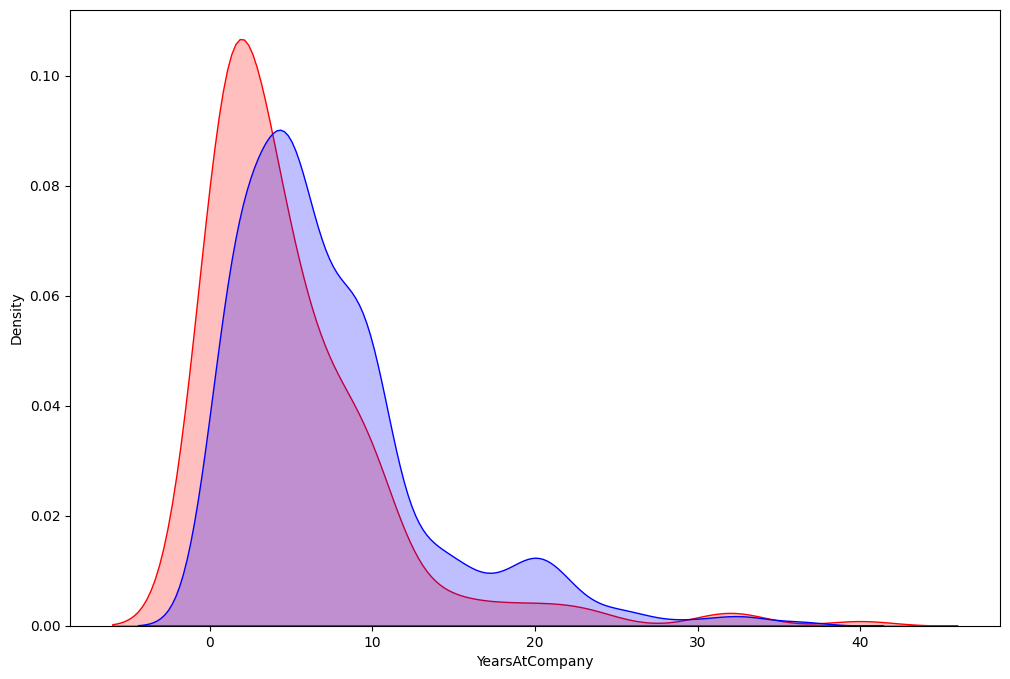

In [22]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df.YearsAtCompany, label='Employess Left', fill='True', color='r')
sns.kdeplot(stayed_df.YearsAtCompany, label='Employess Left', fill='True', color='b');

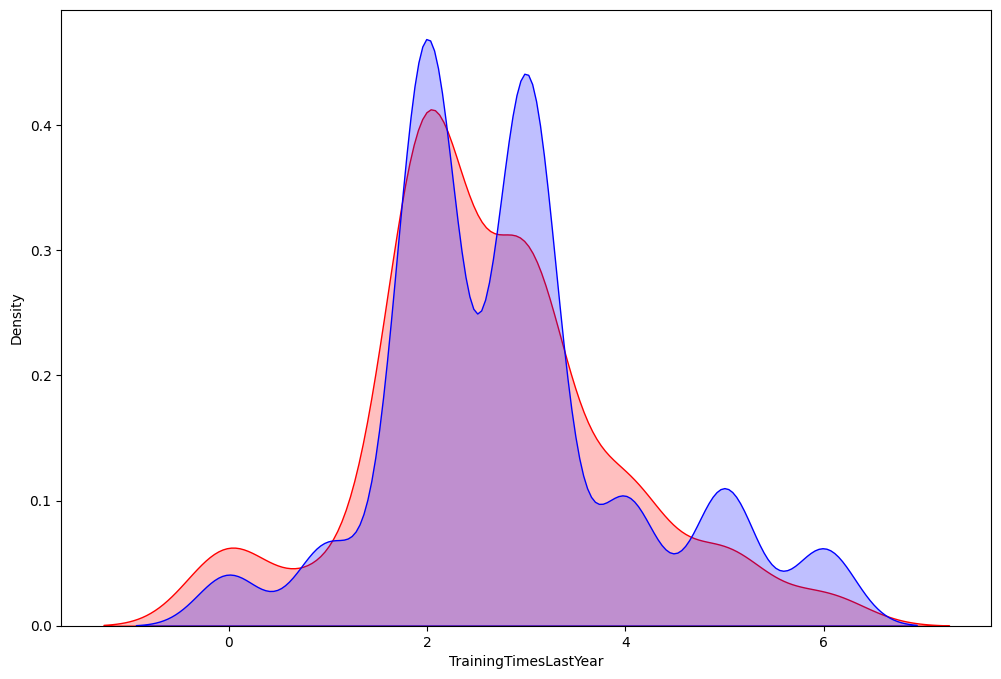

In [23]:
plt.figure(figsize=(12,8))
sns.kdeplot(left_df.TrainingTimesLastYear, label='Employess Left', fill='True', color='r')
sns.kdeplot(stayed_df.TrainingTimesLastYear, label='Employess Stayed', fill='True', color='b');

## Pre Processing

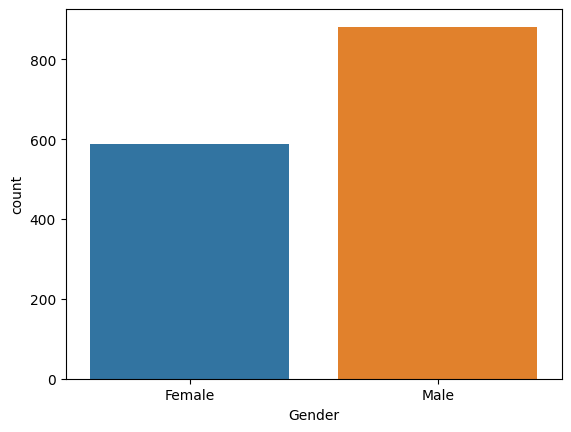

In [24]:
sns.countplot(x = dataset.Gender, data=dataset);

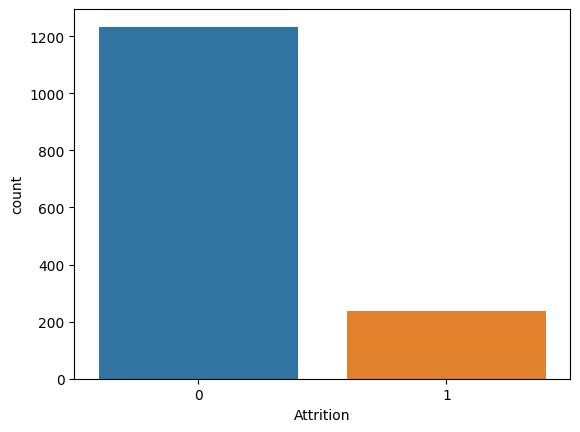

In [25]:
sns.countplot(x = dataset.Attrition, data=dataset);

In [26]:
X = dataset.drop(['Attrition'], axis=1)

In [27]:
df_dummy = pd.get_dummies(X, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender',
                        'JobRole', 'MaritalStatus'])

In [28]:
df_dummy

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1,0,0,0,0,0,0,0,1,0
1466,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,...,0,0,1,0,0,0,0,0,1,0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,0,0,0,0,1,0,0,1,0


In [29]:
df_dummy.Gender_Female.value_counts()

0    882
1    588
Name: Gender_Female, dtype: int64

In [30]:
df_dummy.Gender_Male.value_counts()

1    882
0    588
Name: Gender_Male, dtype: int64

In [31]:
scaler = MinMaxScaler()
#X = scaler.transform(df_dummy)
X = scaler.fit_transform(df_dummy)

In [32]:
y = dataset['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [33]:
smt = SMOTE()
X_smt, y_smt = smt.fit_resample(X, y)
X.shape, y.shape, X_smt.shape, y_smt.shape

((1470, 50), (1470,), (2466, 50), (2466,))

In [34]:
y_smt.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1972, 50), (494, 50), (1972,), (494,))

## Logistic Regression

In [36]:
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)*100

78.13765182186235

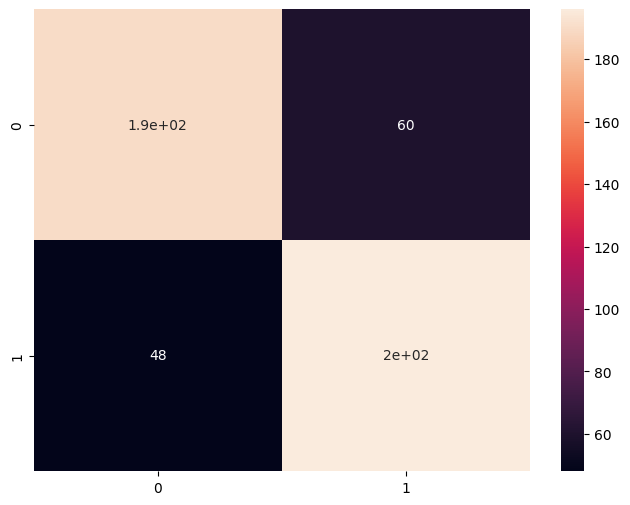

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [39]:
confusion_matrix(y_test, y_pred)

array([[190,  60],
       [ 48, 196]])

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       250
           1       0.77      0.80      0.78       244

    accuracy                           0.78       494
   macro avg       0.78      0.78      0.78       494
weighted avg       0.78      0.78      0.78       494




***********ROC CURVE***********

Curva ROC: 8.74


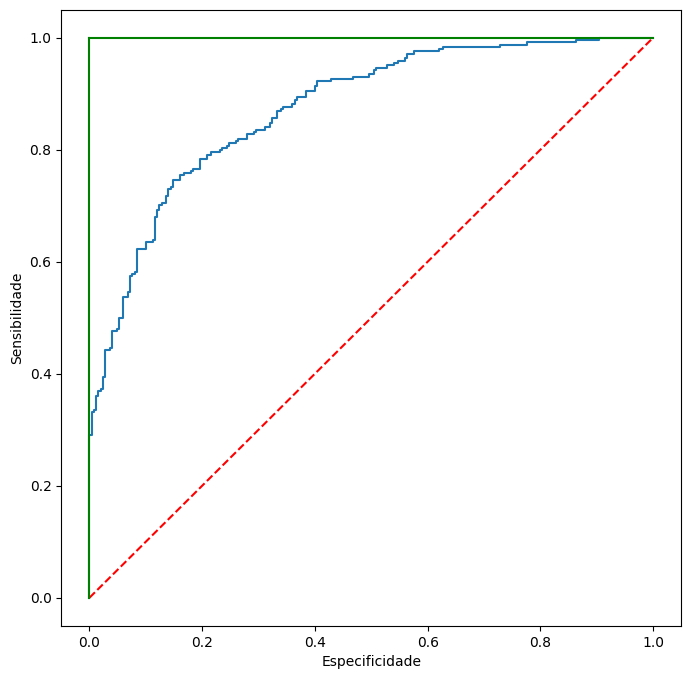

In [41]:
print('\n***********ROC CURVE***********\n')
prob_lr = lr.predict_proba(X_test)[:,1]
fpr, tpr, limit = roc_curve(y_test, prob_lr) # define a curva ROC
roc_lr = roc_auc_score(y_test, prob_lr)
# calculo da area sobre a curva ROC
print(f'Curva ROC: {(round(roc_lr, 3)*10)}')

plt.subplots(1, figsize=(8,8))
plt.plot(fpr, tpr)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls= '--', c = 'red') # plotando linha guia (pontilhada)
plt.plot([0, 0], [1, 0], ls='-', c = 'green'), plt.plot([1, 1], ls='-', c = 'green') # linha guia superior
plt.show()

## Random Forest

In [50]:
random = RandomForestClassifier(max_depth=12, n_estimators=100).fit(X_train, y_train)
y_pred = random.predict(X_test)
accuracy_score(y_test, y_pred)*100

93.31983805668015

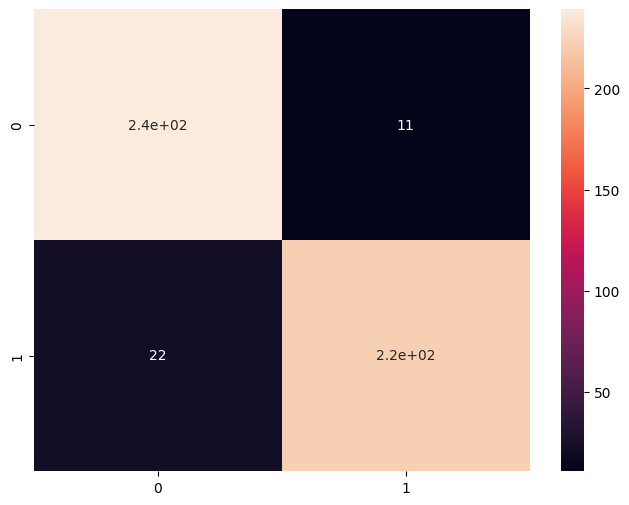

In [51]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       250
           1       0.95      0.91      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494




***********ROC CURVE***********

Curva ROC: 9.75


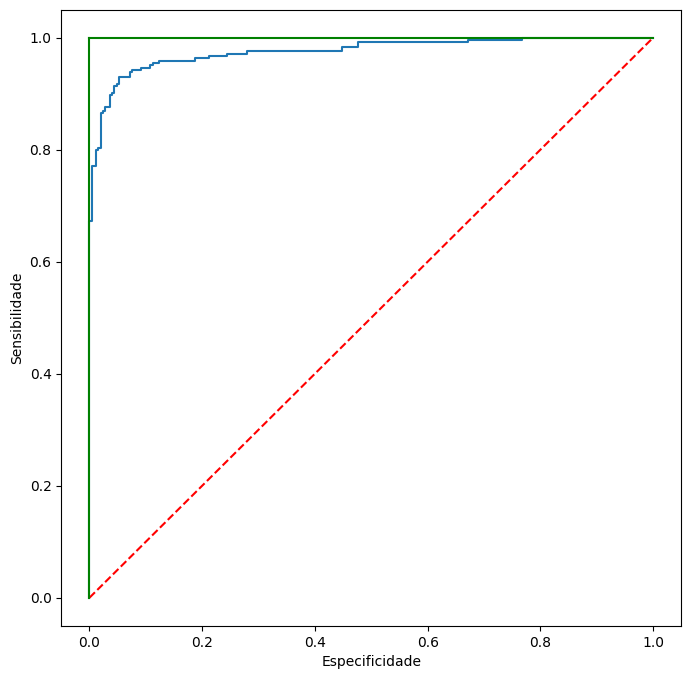

In [55]:
print('\n***********ROC CURVE***********\n')
prob_random = random.predict_proba(X_test)[:,1]
fpr, tpr, limit = roc_curve(y_test, prob_random) # define a curva ROC
roc_lr = roc_auc_score(y_test, prob_lr)
# calculo da area sobre a curva ROC
print(f'Curva ROC: {(round(roc_lr, 3)*10)}')

plt.subplots(1, figsize=(8,8))
plt.plot(fpr, tpr)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls= '--', c = 'red') # plotando linha guia (pontilhada)
plt.plot([0, 0], [1, 0], ls='-', c = 'green'), plt.plot([1, 1], ls='-', c = 'green') # linha guia superior
plt.show()

## Neural Network